# 파이썬 전치행렬 손수 하는 법! 전치행렬하나 만들자고 numpy 설치하시나요?

numpy는 데이터 처리에 엄청난 능력을 보여주는 라이브러리이지만,  
작은 규모의 프로그램에서, 그리고 매번 실행환경이 달라져야 하는 코드라면  
파이썬 기본 문법으로 해결하고 싶을 때도 생깁니다.  
그래서 아주 유용하고 빈번하게 사용되는 전치행렬에 대한 내용을 기본문법으로 구현해 보겠습니다.

## 전치행렬이 뭔데?

일단 행렬이 뭔지 아시는 것을 가정하고 설명하겠습니다.  


행과 열을 뒤바꾸는 것이 전치 행렬인데요.  

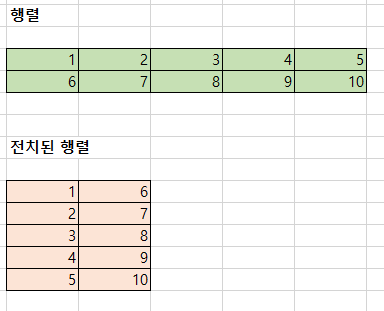

엑셀로 예를 들어보면 이런 식이 되는거죠.  

초록색 데이터는 [1, 2, 3, 4, 5] 로 데이터가 묶였지만  
붉은색 데이터는 [1, 6]으로 데이터가 묶여 있죠?

## 파이썬내장 zip 함수로 전치행렬 만들어보기

In [56]:
이차원행렬 = [
    [1,2],
    [3,4],
    [5,6]
]
print(이차원행렬)

[[1, 2], [3, 4], [5, 6]]


위와 같이 이차원 행렬을 하나 준비해봅니다.  
(3x2) 크기를 갖는 이차원 행렬이군요.

In [58]:
전치행렬1 = list(zip(*이차원행렬))
print(전치행렬1)

[(1, 3, 5), (2, 4, 6)]


그 다음은 엄청 쉽습니다. zip함수를 통해서 위와 같이 코드를 작성하면 끝인데요.  
zip함수가 뭐길래 저렇게 전치행렬이 튀어나오는 걸까요?  

zip함수를 좀더 자세히 다루는 포스팅을 하겠지만,  
일단 zip 함수가 여러개의 리스트를 순서대로 짝을 맞추어 주는 역할을 한다고 이해하시면 됩니다.  
전치행렬이 나오는게 중요하지 zip함수의 원리를 파고드는게 지금 중요하진 않아요.(코드에 있는 별표시도 지금은 신경쓰지 마세요.)  

필요한 곳에 계속 사용하다 보면 자연스럽게 zip 함수의 원리를 공부하게 되실 거고,  
오늘은 맛보기라 생각하세요.

## zip함수 없이 전치행렬 만들기?

전치행렬을 성공적으로 만들었는데, 만약 zip함수를 안쓰고 만들고 싶다면 어떻게 할까요?

In [60]:
## for문 최대원소기준##
전치행렬2 = []
row_num = len(이차원행렬)
col_num = max([len(a) for a in 이차원행렬])

for x in range(col_num):
    tmp = []
    for y in range(row_num):
        try:
            tmp.append(이차원행렬[y][x])
        except:
            tmp.append(0)
    전치행렬2.append(tmp)
        
전치행렬2

[[1, 3, 5], [2, 4, 6]]

짠, 이렇게 코드를 짜면 됩니다!  

그런데 이 코드는 zip 함수를 써서 만드는 전치행렬과는 조금 다르게 구현했는데요.  
가끔 필요할 때가 있어서 이렇게 만들었습니다.  

어떻게 다르냐고요?

In [61]:
이차원행렬 = [
    [1,2],
    [3,4],
    [5,6,7]
]
print(이차원행렬)

[[1, 2], [3, 4], [5, 6, 7]]


이차원행렬의 구성을 이렇게 바꿔볼게요. 각 행의 원소들 갯수가 다르죠?

In [62]:
전치행렬3 = list(zip(*이차원행렬))
print(전치행렬3)

[(1, 3, 5), (2, 4, 6)]


그런데 zip 함수로 전치행렬을 구해보면 다음과 같이 7이 무시된 채로 행렬이 반환됩니다.  
왜냐하면 zip함수는 매칭하는 함수이기 때문에, 작은 원소를 가진 행을 기준으로 전치행렬을 만들기 때문이죠.  

그런데 사실 이렇게 되면 가지고 있던 데이터의 일부가 손실되는 꼴이니  
사용자의 의도와는 조금 다른 코드가 될 수 있습니다.

In [63]:
## for문 최대원소기준##
전치행렬4 = []
row_num = len(이차원행렬)
col_num = max([len(a) for a in 이차원행렬])

for x in range(col_num):
    tmp = []
    for y in range(row_num):
        try:
            tmp.append(이차원행렬[y][x])
        except:
            tmp.append(0)
    전치행렬4.append(tmp)
        
전치행렬4

[[1, 3, 5], [2, 4, 6], [0, 0, 7]]

그런데 제가 아까 for문을 사용해서 만든 코드를 실행하면,  
짝 지을 원소가 없어서 누락되었던 7도 결과값으로 들어가고, 공석이 될 수 밖에 없는 자리는 0으로 채워져 있죠?  

이렇게 최대원소 기준으로 전치행렬을 만들어야 할 상황이 있어서, 코드를 이렇게 짜 봤습니다.

코드를 함수로 만들어 재사용성을 높혀볼까요?

In [64]:
def 최대전치(이차원행렬):
    전치행렬 = []
    row_num = len(이차원행렬)
    col_num = max([len(a) for a in 이차원행렬])

    for x in range(col_num):
        tmp = []
        for y in range(row_num):
            try:
                tmp.append(이차원행렬[y][x])
            except:
                tmp.append(0)
        전치행렬.append(tmp)

    return 전치행렬

함수로 만들었으니 테스트 해보겠습니다.

In [65]:
전치행렬5 = 최대전치(이차원행렬)
print(전치행렬5)

[[1, 3, 5], [2, 4, 6], [0, 0, 7]]


잘 되는 군요!!! 꼭 한번 따라서 코드를 작성해 보세요!!